# Objetivo 7: Garantizar el acceso a una energía asequible, segura, sostenible y moderna 
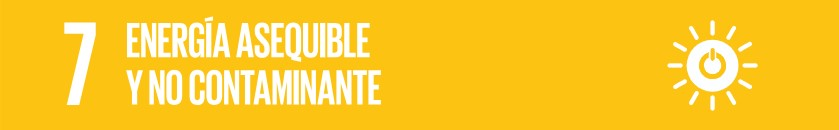

#### Este objetivo pretende garantizar el acceso a una energía limpia y asequible.

#### 660 millones de personas continuarán sin acceso a la energía eléctrica y casi 2000 millones de personas seguirán dependiendo de combustibles y tecnologías contaminantes para cocinar en 2030.

#### Para garantizar acceso universal a electricidad asequible en 2030, es necesario invertir en fuentes de energía limpia, como la solar, eólica y termal.

#### Ampliar las infraestructuras y mejorar la tecnología para suministrar energía limpia en todos los países en desarrollo son objetivos cruciales que contribuyen tanto al desarrollo como al medioambiente.

#### Por eso vamos a scrapear datos sobre la energía instalada en Argentina para obtener buenos indicadores que nos demuestren como esta posicionado el país con este objetivo de la ONU

In [1]:
# Importamos las biliotecas
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from sklearn.impute import SimpleImputer
from selenium import webdriver
from bs4 import BeautifulSoup
from io import StringIO 
import pandas as pd
import time
import re

In [2]:
# FUNCIÓN DE LIMPIEZA PARA CORREGIR DECIMALES (FINAL)
def limpiar_potencia(df):
    """Convierte la columna de potencia al formato numérico correcto (punto decimal)"""
    col_nombre = 'POTENCIA INSTALADA (MW)'
    
    if col_nombre in df.columns:
        # Reemplaza el separador de miles (punto) y luego la coma decimal por punto.
        df[col_nombre] = (
            df[col_nombre]
            .astype(str)
            .str.replace(',', '.', regex=False)
        )
        # Convierte al tipo numérico (float)
        df[col_nombre] = pd.to_numeric(df[col_nombre], errors='coerce')
    return df

### Scaping a los datos publicos de energía renovable instaladas para generar

In [3]:
# Url de la pagina web
url = "https://www.argentina.gob.ar/economia/energia/energia-electrica/renovables/plantas-de-energia-renovable-en-operacion-comercial"

# Lista para almacenar todas las tablas de las paginas
todos_los_dataframes = []

# Número de paginas
TOTAL_PAGES = 20

In [4]:
# Inicializar el WebDriver
driver = webdriver.Chrome() 
print(f"Abriendo la URL: {url}")
driver.get(url)

# Esperar a que la tabla se cargue
wait = WebDriverWait(driver, 20)
print("Tabla cargada. Iniciando extracción página por página...")

# Bucle para recorrer todas las paginas
for pagina_actual in range(1, TOTAL_PAGES + 1):
    print(f"-> Extrayendo datos de la Página {pagina_actual} de {TOTAL_PAGES}...")
    tabla_elemento = driver.find_element(By.ID, "ponchoTable")
        
    # Preprocesar el HTML para normalizar formatos numéricos antes de usar pandas
    html_table = tabla_elemento.get_attribute('outerHTML')
    soup_table = BeautifulSoup(html_table, 'html.parser')
    for cell in soup_table.find_all(['td', 'th']):
        text = cell.get_text()
        if re.search(r"\d[\.,]\d", text):
            nuevo = text.replace('.', '').replace(',', '.')
            cell.string = nuevo

    # Convertir la tabla HTML a DataFrame de pandas
    df_actual = pd.read_html(StringIO(str(soup_table)))[0]
    df_actual = limpiar_potencia(df_actual)
    
    # Almacenar el DataFrame de la página actual
    todos_los_dataframes.append(df_actual)

    # Navegar a la siguiente página si no es la última
    if pagina_actual < TOTAL_PAGES:
        # El ID 'ponchoTable_next' es la referencia al botón '>'
        btn_avance = wait.until(EC.element_to_be_clickable((By.ID, "ponchoTable_next")))
                
        if "disabled" in btn_avance.get_attribute("class"):
            print("El botón de avance está desactivado. Extracción completa.")
            break
                    
        # Clic forzado con JavaScript para evitar 'element not interactable'
        driver.execute_script("arguments[0].click();", btn_avance)
                
        # Pausa para que el navegador cargue los datos de la nueva página
        time.sleep(1.5)
        
# Cerrar el navegador
driver.quit()

Abriendo la URL: https://www.argentina.gob.ar/economia/energia/energia-electrica/renovables/plantas-de-energia-renovable-en-operacion-comercial
Tabla cargada. Iniciando extracción página por página...
-> Extrayendo datos de la Página 1 de 20...
-> Extrayendo datos de la Página 2 de 20...
-> Extrayendo datos de la Página 3 de 20...
-> Extrayendo datos de la Página 4 de 20...
-> Extrayendo datos de la Página 5 de 20...
-> Extrayendo datos de la Página 6 de 20...
-> Extrayendo datos de la Página 7 de 20...
-> Extrayendo datos de la Página 8 de 20...
-> Extrayendo datos de la Página 9 de 20...
-> Extrayendo datos de la Página 10 de 20...
-> Extrayendo datos de la Página 11 de 20...
-> Extrayendo datos de la Página 12 de 20...
-> Extrayendo datos de la Página 13 de 20...
-> Extrayendo datos de la Página 14 de 20...
-> Extrayendo datos de la Página 15 de 20...
-> Extrayendo datos de la Página 16 de 20...
-> Extrayendo datos de la Página 17 de 20...
-> Extrayendo datos de la Página 18 de 20..

In [5]:
# Concatenar y guardar todos los DataFrames
if todos_los_dataframes:
    df_completo = pd.concat(todos_los_dataframes, ignore_index=True)

#### Exploracion de los datos

In [6]:
df_completo.head()

,ORIGEN,TECNOLOGÍA,NOMBRE DEL PROYECTO,POTENCIA INSTALADA (MW),PROVINCIA,REGIÓN
0,RENOVAR RONDA 1,BIOGÁS,C.T. RÍO CUARTO I,2.00,CÓRDOBA,CENTRO
1,RENOVAR RONDA 1,BIOGÁS,C.T. RÍO CUARTO II,1.20,CÓRDOBA,CENTRO
2,RENOVAR RONDA 1,BIOGÁS,C.T. YANQUETRUZ,1.50,SAN LUIS,CENTRO
3,RENOVAR RONDA 1,BIOGÁS,C.T. SAN PEDRO VERDE,1.42,SANTA FE,LITORAL
4,RENOVAR RONDA 1,BIOMASA,C.T. GENERACIÓN BIOMASA SANTA ROSA,15.00,CORRIENTES,NEA


In [7]:
# Mostrar información del DataFrame completo
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ORIGEN                   199 non-null    object 
 1   TECNOLOGÍA               199 non-null    object 
 2   NOMBRE DEL PROYECTO      199 non-null    object 
 3   POTENCIA INSTALADA (MW)  199 non-null    float64
 4   PROVINCIA                199 non-null    object 
 5   REGIÓN                   199 non-null    object 
dtypes: float64(1), object(5)
memory usage: 9.5+ KB


#### Limpieza de los datos

In [8]:
# Seleccionamos las variables de interes
df_completo = df_completo[["TECNOLOGÍA", "POTENCIA INSTALADA (MW)", "PROVINCIA"]]

#### Transformacion de los datos

In [9]:
# Diccionario para mapear provincias a regiones
region_map = {
    "JUJUY" : "NOA",
    "SALTA" : "NOA",
    "TUCUMAN" : "NOA",
    "CATAMARCA" : "NOA",
    "SANTIAGO DEL ESTERO" : "NOA",
    "FORMOSA" : "NEA",
    "CHACO" : "NEA",
    "CORRIENTES" : "NEA",
    "MISIONES" : "NEA",
    "CÓRDOBA" : "Pampeana",
    "SANTA FE" : "Pampeana",
    "ENTRE RIOS" : "Pampeana",
    "LA PAMPA" : "Pampeana",
    "BUENOS AIRES" : "Pampeana",
    "MENDOZA" : "Cuyo",
    "SAN JUAN" : "Cuyo",
    "SAN LUIS" : "Cuyo",
    "LA RIOJA" : "Cuyo",
    "NEUQUEN" : "Patagonia",
    "RÍO NEGRO" : "Patagonia",
    "CHUBUT" : "Patagonia",
    "SANTA CRUZ" : "Patagonia",
    "TIERRA DEL FUEGO" : "Patagonia"
}

# Mapear provincias a regiones
df_completo['REGION'] = df_completo['PROVINCIA'].map(region_map)

In [10]:
# Mapeamos las fuentes de energia
fuente_map = {
    "EÓLICA": "EOLICA",
    "PAH": "HIDRAULICA",
    "SOLAR": "SOLAR",
    "BIOGÁS": "BIOGAS",
    "BIOMASA": "BIOMASA",
    "BRS": "BIOGAS"
}

# Mapear las tecnologías
df_completo['TECNOLOGÍA'] = df_completo['TECNOLOGÍA'].map(fuente_map)

#### Guardamos los datos procesados

In [12]:
# Guardar el DataFrame completo en un archivo CSV
nombre_archivo = "archivos/plantas_renovables_2023.csv"
df_completo.to_csv(nombre_archivo, index=False, encoding='utf-8')

### Abrimos un archivo para completar la otra parte de la energia instalada que no es provenientes de fuentes renovables

In [13]:
# Abrimos el csv
datos_2023 = pd.read_csv("archivos/generacin-elctrica-centrales-de-generacin.csv")

#### Exploracion de los datos

In [14]:
# Mostramos las primeras filas
datos_2023.head()

,nombre,central,tecnologia_etiqueta,nombre_agente,tecnologia,tecnologia_maquinas,potencia_instalada_mw,provincia,departamento,aglomeracion,sistema,pah,id_renovar,resolucion_renovables,fuente,geojson
0,EL TUNAL,TUNAHI,Hidroeléctrica (Menor a 50 Mw),AES JURAMENTO,HI<50,HIDRAULICA <=50,10.52,SALTA,Anta,NaN,Interconectado MEM,Si,SPT-PAH-17,NaN,cammesa,"{""type"":""Point"",""coordinates"":[-64.47643051625..."
1,CABRA CORRAL,CCORHI,Hidroeléctrica,AES JURAMENTO,HI>50,TURB HIDRAULICA,100.50,SALTA,La Viña,NaN,Interconectado MEM,NaN,NaN,NaN,cammesa,"{""type"":""Point"",""coordinates"":[-65.32999909308..."
2,CORRALITO,NaN,Hidroeléctrica (Menor a 50 Mw),NaN,HI,NaN,NaN,SALTA,Rosario de Lerma,NaN,Interconectada no MEM,NaN,NaN,NaN,cammesa,"{""type"":""Point"",""coordinates"":[-65.68652714390..."
3,LOS MADERAS,LMADHI,Hidroeléctrica (Menor a 50 Mw),HIDROELECTRICA LAS MADERAS,HI<50,HIDRAULICA <=50,30.60,JUJUY,El Carmen,NaN,Interconectado MEM,Si,SPT-PAH-08,NaN,cammesa,"{""type"":""Point"",""coordinates"":[-65.21973649839..."
4,RIO REYES,RREYHI,Hidroeléctrica (Menor a 50 Mw),HIDROELECTRICA REYES EJSEDSA,HI<50,HIDRAULICA <=50,7.00,JUJUY,Dr. Manuel Belgrano,NaN,Interconectado MEM,Si,SPT-PAH-09,NaN,cammesa,"{""type"":""Point"",""coordinates"":[-65.49163488323..."


In [15]:
# Mostramos la infor del DataFrame
datos_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nombre                 507 non-null    object 
 1   central                432 non-null    object 
 2   tecnologia_etiqueta    507 non-null    object 
 3   nombre_agente          432 non-null    object 
 4   tecnologia             507 non-null    object 
 5   tecnologia_maquinas    432 non-null    object 
 6   potencia_instalada_mw  336 non-null    float64
 7   provincia              506 non-null    object 
 8   departamento           505 non-null    object 
 9   aglomeracion           126 non-null    object 
 10  sistema                507 non-null    object 
 11  pah                    46 non-null     object 
 12  id_renovar             195 non-null    object 
 13  resolucion_renovables  2 non-null      object 
 14  fuente                 507 non-null    object 
 15  geojso

#### Limpieza de los datos

In [16]:
# Reemplazar valor de provincia en la linea 58
datos_2023.loc[58, 'provincia'] = 'CORRIENTES'

In [17]:
# Seleccionamos las variables de interes
datos_2023 = datos_2023[["tecnologia_etiqueta", "tecnologia", "potencia_instalada_mw", "provincia",]]

#### Transformacion de los datos

In [18]:
# Reemplazar "Hidroeléctrica (Menor a 50 Mw)" por "hidroelectrica" en la columna 'tecnologia_etiqueta'
datos_2023['tecnologia_etiqueta'] = datos_2023['tecnologia_etiqueta'].replace("Hidroeléctrica (Menor a 50 Mw)", "Hidroelectrica")
datos_2023['tecnologia_etiqueta'] = datos_2023['tecnologia_etiqueta'].replace("Hidroeléctrica", "Hidroelectrica")
datos_2023['tecnologia_etiqueta'] = datos_2023['tecnologia_etiqueta'].replace("Térmica", "TERMICA")
datos_2023['tecnologia_etiqueta'] = datos_2023['tecnologia_etiqueta'].replace("Nuclear", "NUCLEAR")
datos_2023['tecnologia_etiqueta'] = datos_2023['tecnologia_etiqueta'].replace("Eólica", "Eolica")

In [19]:
# Reemplazar tecnologia
datos_2023['tecnologia'] = datos_2023['tecnologia'].replace("HI", "HI>50")

In [20]:
# Diccionario para mapear provincias a regiones
region_map = {
    "JUJUY" : "NOA",
    "SALTA" : "NOA",
    "TUCUMAN" : "NOA",
    "CATAMARCA" : "NOA",
    "SANTIAGO DEL ESTERO" : "NOA",
    "FORMOSA" : "NEA",
    "CHACO" : "NEA",
    "CORRIENTES" : "NEA",
    "MISIONES" : "NEA",
    "CORDOBA" : "Pampeana",
    "SANTA FE" : "Pampeana",
    "ENTRE RIOS" : "Pampeana",
    "LA PAMPA" : "Pampeana",
    "BUENOS AIRES" : "Pampeana",
    "MENDOZA" : "Cuyo",
    "SAN JUAN" : "Cuyo",
    "SAN LUIS" : "Cuyo",
    "LA RIOJA" : "Cuyo",
    "NEUQUEN" : "Patagonia",
    "RIO NEGRO" : "Patagonia",
    "CHUBUT" : "Patagonia",
    "SANTA CRUZ" : "Patagonia",
    "TIERRA DEL FUEGO" : "Patagonia",
    "CIUDAD AUTONOMA DE BUENOS": "Pampeana"
}

# Mapear provincias a regiones
datos_2023['region'] = datos_2023['provincia'].map(region_map)

In [21]:
# Crear el imputador con estrategia 'median'
imputer = SimpleImputer(strategy='median')

# Imputar valores nulos de 'potencia_instalada_mw' con la mediana por grupo de 'tecnologia'
datos_2023['potencia_instalada_imputada'] = datos_2023.groupby('tecnologia')['potencia_instalada_mw']\
    .transform(lambda x: x.fillna(x.median()))

In [22]:
# Filtrar las tecnologías no renovables en 'datos_2023'
renewables = ['Fotovoltaica', 'Hidroelectrica', 'Eolica', 'Biogas', 'Biomasa']
datos_2023 = datos_2023[~datos_2023['tecnologia_etiqueta'].isin(renewables)].copy()

In [23]:
# Seleccionamos las variables de interes
datos_2023 = datos_2023[["tecnologia_etiqueta", "potencia_instalada_imputada", "provincia", "region"]]

#### Guardamos los datos procesados

In [24]:
# Guardar el DataFrame completo en un archivo CSV
nombre_archivo = "archivos/plantas_no_renovables_2023.csv"
datos_2023.to_csv(nombre_archivo, index=False, encoding='utf-8')

## Combinar ambos archivos

In [25]:
# Combinar archivos renovables y no renovables en un solo CSV
# Asume que pandas ya fue importado en el notebook

# Leer los archivos guardados
df_ren = pd.read_csv("archivos/plantas_renovables_2023.csv")
df_no_ren = pd.read_csv("archivos/plantas_no_renovables_2023.csv")

# Normalizar nombres de columnas a un esquema común
df_ren = df_ren.rename(columns={
    "TECNOLOGÍA": "tecnologia",
    "POTENCIA INSTALADA (MW)": "potencia_instalada_mw",
    "PROVINCIA": "provincia",
    "REGION": "region"
})

df_no_ren = df_no_ren.rename(columns={
    "tecnologia_etiqueta": "tecnologia",
    "potencia_instalada_imputada": "potencia_instalada_mw",
    "provincia": "provincia",
    "region": "region"
})

# Asegurar tipos y limpieza básica
for df in (df_ren, df_no_ren):
    if "potencia_instalada_mw" in df.columns:
        df["potencia_instalada_mw"] = pd.to_numeric(df["potencia_instalada_mw"], errors="coerce")
    if "tecnologia" in df.columns:
        df["tecnologia"] = df["tecnologia"].astype(str).str.upper().str.strip()
    if "provincia" in df.columns:
        df["provincia"] = df["provincia"].astype(str).str.upper().str.strip()
    if "region" in df.columns:
        df["region"] = df["region"].astype(str).str.upper().str.strip()

# Concatenar y guardar
df_todas = pd.concat([df_ren, df_no_ren], ignore_index=True, sort=False)
df_todas.to_csv("archivos/plantas_todas_2023.csv", index=False, encoding="utf-8")

# Mostrar resumen
print("CSV combinado guardado en: archivos/plantas_todas_2023.csv")
print("Filas totales:", df_todas.shape[0])
print(df_todas.head())

CSV combinado guardado en: archivos/plantas_todas_2023.csv
Filas totales: 438
  tecnologia  potencia_instalada_mw   provincia    region
0     BIOGAS                   2.00     CÓRDOBA  PAMPEANA
1     BIOGAS                   1.20     CÓRDOBA  PAMPEANA
2     BIOGAS                   1.50    SAN LUIS      CUYO
3     BIOGAS                   1.42    SANTA FE  PAMPEANA
4    BIOMASA                  15.00  CORRIENTES       NEA
